# Making hybrid images using numpy (no use of openCV)

This method has been implemented using numpy only instead of OpenCV. The filter is applied using the basic definition of convolution.

## Hybrid images:

Hybrid images are images with two interpretations. The interpretation changes with viewing distance. By two suitable images these can be created. One of the superimposing images has to be in low frequency, while the other has to be in high frequency (which will be generated by applying appropriate filters).

### cv2.filter2D numpy implementation

We have constructed a linear filter function that acts like cv2.filter2D().
This uses the basic idea of convolution.
Let the image be $I$ and the filter be $F$, the convolution between the image and the filter is defined as

$$I(x,y)*F=\sum_{i=-N}^N\sum_{i=-M}^M I(x+i,y+j)F(i,j)$$

#### Parameters:

The function takes two parameters as input:

**image:** Any image to be filtered
**filter:** A filter of size n x m (where n may equal m), n and m bothe being odd

#### Handling Color

We need to do is determine whether the image we have is a color image or a grayscale image. We can check this through the shape of the image matrix. If the dimension is 3 then it is a color image, else, it is a grayscale image.

####  Padding

Now, the image needs to be padded. The amount of padding depends on the filter dimensions.

#### Convolution

Next we perform convolution. We need to slide filter over our padded image matrix and perform element-wise multiplication between the two. Then we need to take the summation of the elements and add them to an array that is the size of our image. We create a nested for loop where $i$ indexes the rows and $j$ indexes the columns.

#### Return array

We then return the convolution array as our output and we have our filtered image which is the same resolution as the input image.

# Example images

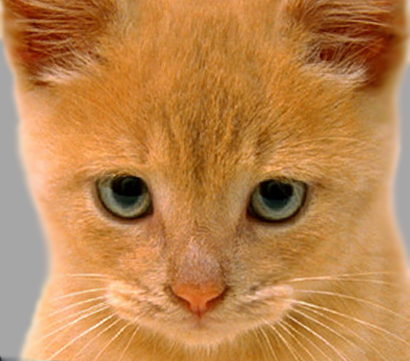

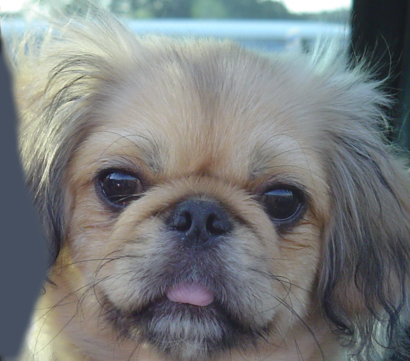

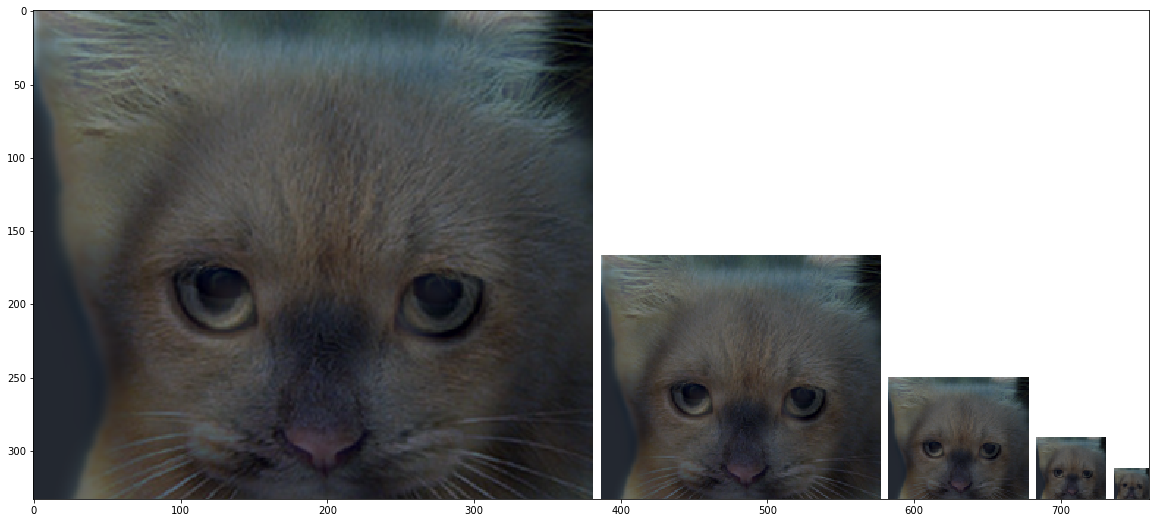

In [ ]:
import numpy as np

def my_filter(image, filter):
       
    assert filter.shape[0] % 2 == 1
    assert filter.shape[1] % 2 == 1
    
    width=filter.shape[1]
    height=filter.shape[0]
    width=(width)//2
    height=height//2
    if (len(image.shape)==3):
        image_cp0=np.pad(image[:,:,0],((height,height),(width,width)),'reflect')
        image_cp1=np.pad(image[:,:,1],((height,height),(width,width)),'reflect')
        image_cp2=np.pad(image[:,:,2],((height,height),(width,width)),'reflect')
    
        imagest=np.dstack([image_cp0,image_cp1,image_cp2])
   
        filter=filter[::-1,::-1]
        h,w=imagest.shape[:2]
        n=filter.shape[0]//2
        m=filter.shape[1]//2
        filtered_image = np.zeros(imagest.shape)
    
        for i in range(n,h-n):
            for j in range(m,w-m):
                sum0=np.sum(filter*imagest[i-n:i+n+1,j-m:j+m+1,0])
                filtered_image[i,j,0]=sum0
                sum1=np.sum(filter*imagest[i-n:i+n+1,j-m:j+m+1,1])
                filtered_image[i,j,1]=sum1
                sum2=np.sum(filter*imagest[i-n:i+n+1,j-m:j+m+1,2])
                filtered_image[i,j,2]=sum2
    else:
        imagest=np.pad(image,((height,height),(width,width)),'reflect')
        
        filter=filter[::-1,::-1]
        h,w=imagest.shape[:2]
        n=filter.shape[0]//2
        m=filter.shape[1]//2
        filtered_image = np.zeros(imagest.shape)
        
        for i in range(n,h-n):
            for j in range(m,w-m):
                sum0=np.sum(filter*imagest[i-n:i+n+1,j-m:j+m+1])
                filtered_image[i,j]=sum0


    return filtered_image[n:h-n,m:w-m]

def create_hybrid_image(image1, image2, filter):

    assert image1.shape == image2.shape

        
    low_frequencies=my_filter(image1, filter)
    high_frequencies=image2-my_filter(image2, filter)
    hybrid_image=(low_frequencies+high_frequencies)/2

      
    return low_frequencies, high_frequencies, hybrid_image